# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 607


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lloydminster
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | hervey bay
Processing Record 4 of Set 1 | areosa
Processing Record 5 of Set 1 | severo-kurilsk
Processing Record 6 of Set 1 | hobart
Processing Record 7 of Set 1 | ponta do sol
Processing Record 8 of Set 1 | upernavik
Processing Record 9 of Set 1 | atuona
Processing Record 10 of Set 1 | lagdo
Processing Record 11 of Set 1 | bluff
Processing Record 12 of Set 1 | zhanatas
City not found. Skipping...
Processing Record 13 of Set 1 | zhongxing
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | vilyuysk
Processing Record 16 of Set 1 | vegreville
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | lasa
Processing Record 19 of Set 1 | puerto ayora
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | flagstaff
Processing Record 22 of Set 1 | kaeo
Processing Reco

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          561
Lat           561
Lng           561
Max Temp      561
Humidity      561
Cloudiness    561
Wind Speed    561
Country       561
Date          561
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lloydminster,53.2835,-110.0016,10.12,29,75,8.75,CA,1682301510
1,ushuaia,-54.8000,-68.3000,7.81,53,20,2.06,AR,1682301335
2,hervey bay,-25.2986,152.8535,26.12,60,41,10.09,AU,1682301370
3,areosa,41.7178,-8.8571,14.75,95,96,1.68,PT,1682301511
4,severo-kurilsk,50.6789,156.1250,0.56,81,100,8.95,RU,1682301239


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lloydminster,53.2835,-110.0016,10.12,29,75,8.75,CA,1682301510
1,ushuaia,-54.8000,-68.3000,7.81,53,20,2.06,AR,1682301335
2,hervey bay,-25.2986,152.8535,26.12,60,41,10.09,AU,1682301370
3,areosa,41.7178,-8.8571,14.75,95,96,1.68,PT,1682301511
4,severo-kurilsk,50.6789,156.1250,0.56,81,100,8.95,RU,1682301239


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

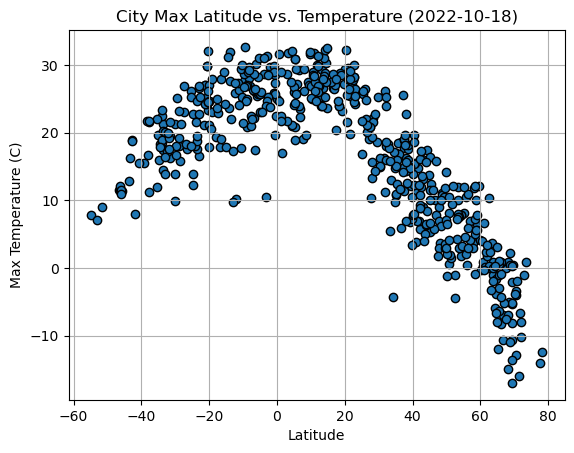

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolors='black')

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temperature (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid()

# Save the figure
plt.savefig("../Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

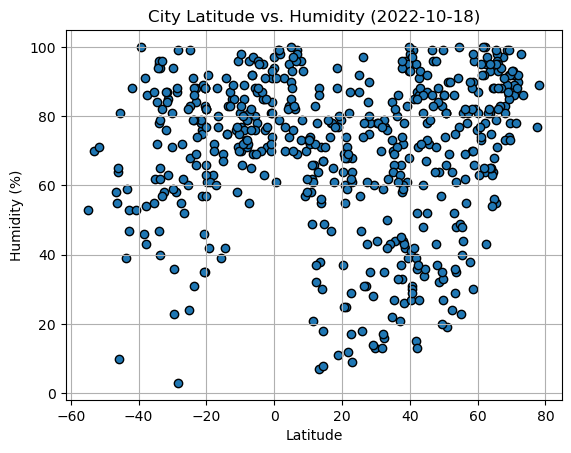

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()

# Save the figure
plt.savefig("../Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

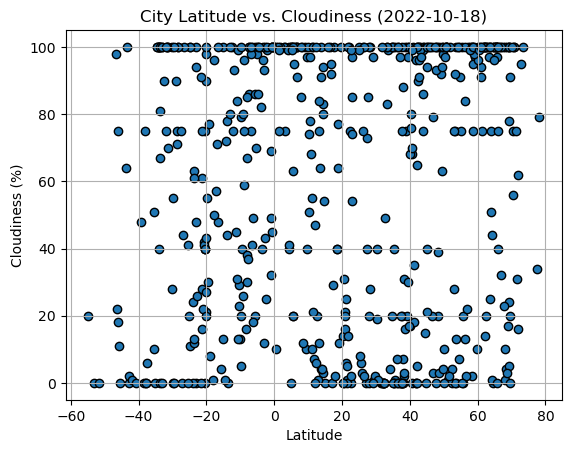

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()

# Save the figure
plt.savefig("../Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

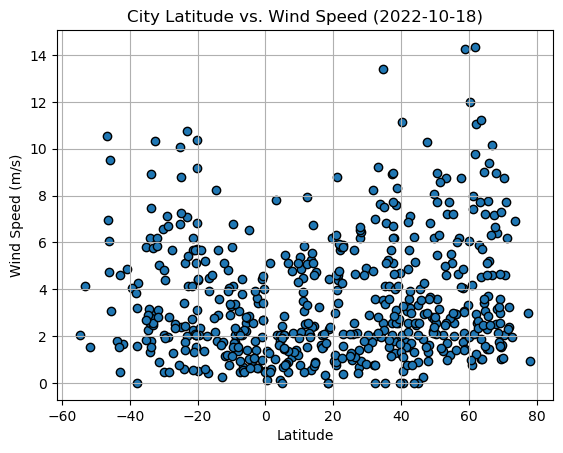

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid()

# Save the figure
plt.savefig("../Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots (Generalize)

def create_lin_plots(df, x_col, y_col, placement): 
    x_values = df[x_col]
    y_values = df[y_col]
    model = st.linregress(x_values, y_values)
    
    slope = model[0]
    intercept = model[1]
    regress_values = x_values * slope + intercept
    
    line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"red")
    plt.annotate(line_eq,placement,fontsize=15,color="red")
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.show()
    
    print(f"The r-value is: {model[2]}")

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lloydminster,53.2835,-110.0016,10.12,29,75,8.75,CA,1682301510
3,areosa,41.7178,-8.8571,14.75,95,96,1.68,PT,1682301511
4,severo-kurilsk,50.6789,156.1250,0.56,81,100,8.95,RU,1682301239
6,ponta do sol,32.6667,-17.1000,18.35,77,49,2.01,PT,1682301512
7,upernavik,72.7868,-56.1549,-1.11,98,95,1.97,GL,1682301512


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ushuaia,-54.8000,-68.3000,7.81,53,20,2.06,AR,1682301335
2,hervey bay,-25.2986,152.8535,26.12,60,41,10.09,AU,1682301370
5,hobart,-42.8794,147.3294,18.92,53,0,4.63,AU,1682301512
8,atuona,-9.8000,-139.0333,27.57,77,5,5.80,PF,1682301512
10,bluff,-46.6000,168.3333,11.56,58,98,10.53,NZ,1682301513


###  Temperature vs. Latitude Linear Regression Plot

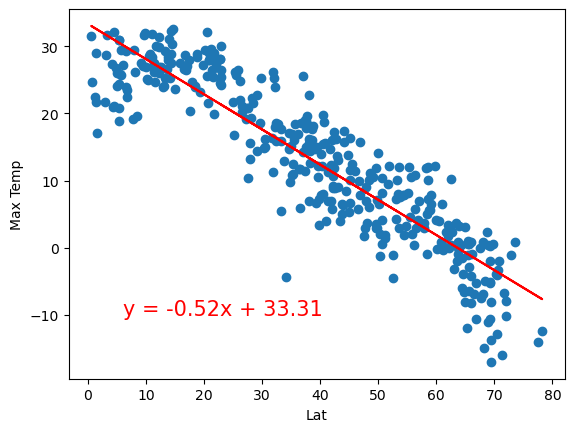

The r-value is: -0.9099609693625417


In [15]:
# Linear regression on Northern Hemisphere
create_lin_plots(northern_hemi_df, 'Lat', 'Max Temp',(6,-10)) 

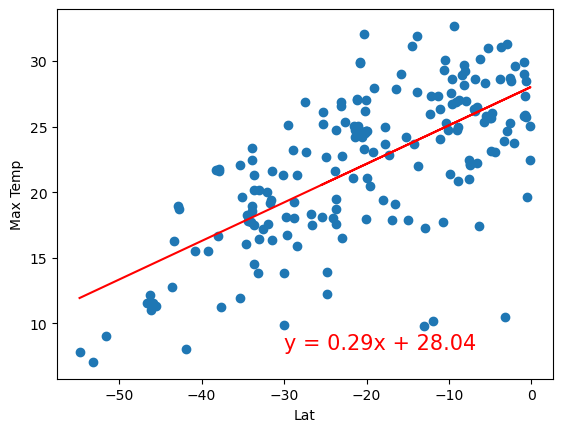

The r-value is: 0.6790575855640936


In [16]:
# Linear regression on Southern Hemisphere
create_lin_plots(southern_hemi_df, 'Lat', 'Max Temp', (-30,8)) 

**Discussion about the linear relationship:** There is a strong linear relationship between Latitude and Maximum Temperature. In the northern hemisphere, the relationship is inverse: as Latitude increases, Max Temperature decreases. In the southern hemisphere, the relationship is direct: as Latitude increases, Max Temperature increases.

### Humidity vs. Latitude Linear Regression Plot

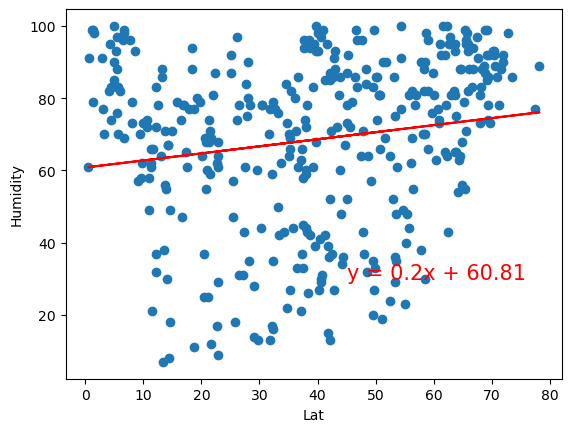

The r-value is: 0.1703309578244441


In [17]:
# Northern Hemisphere
create_lin_plots(northern_hemi_df,'Lat','Humidity', (45,30)) 

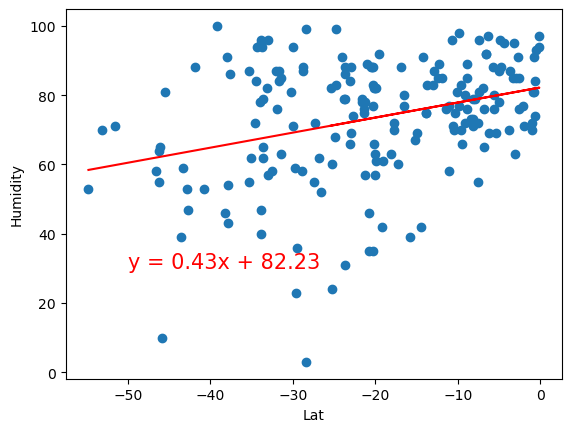

The r-value is: 0.3267463666499762


In [18]:
# Southern Hemisphere
create_lin_plots(southern_hemi_df, 'Lat','Humidity', (-50,30)) 

**Discussion about the linear relationship:** There is a weak linear relationship between Latitude and Humidity. In the northern hemisphere, the relationship is direct: as Latitude increases, Humidity increases. In the southern hemisphere, the relationship is inverse: as Latitude increases, Humidity decreases.

### Cloudiness vs. Latitude Linear Regression Plot

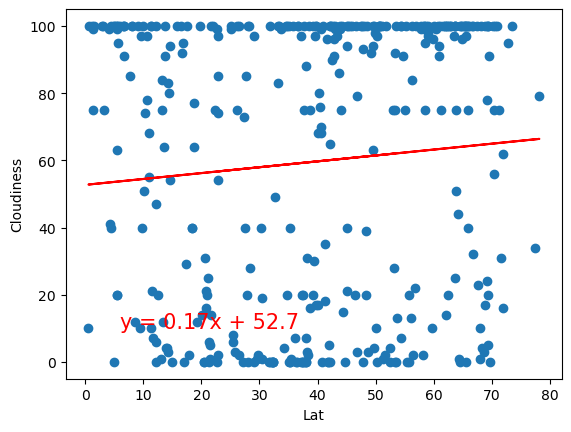

The r-value is: 0.08571367720595642


In [19]:
# Northern Hemisphere
create_lin_plots(northern_hemi_df, 'Lat','Cloudiness', (6, 10))

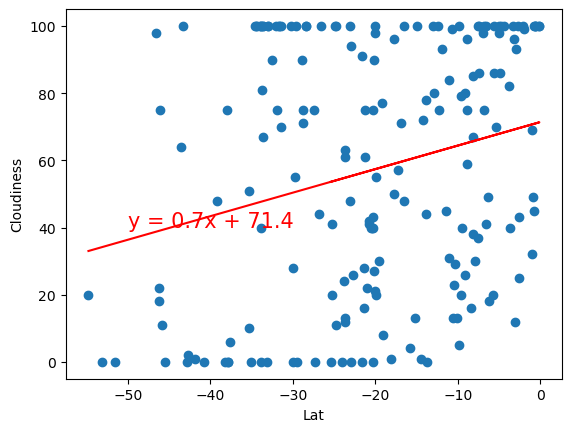

The r-value is: 0.24711773869297685


In [20]:
# Southern Hemisphere
create_lin_plots(southern_hemi_df, 'Lat','Cloudiness', (-50, 40))

**Discussion about the linear relationship:** There is no relationship between Latitude and Cloudiness. As Latitude increases, there is no significant change in Cloudiness. 

### Wind Speed vs. Latitude Linear Regression Plot

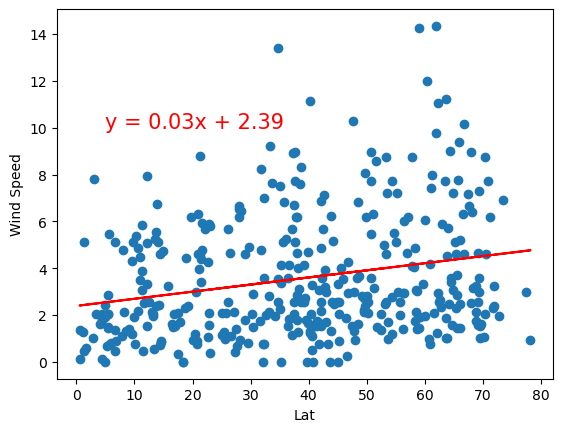

The r-value is: 0.23393503797104945


In [21]:
# Northern Hemisphere
create_lin_plots(northern_hemi_df, 'Lat','Wind Speed',(5,10))

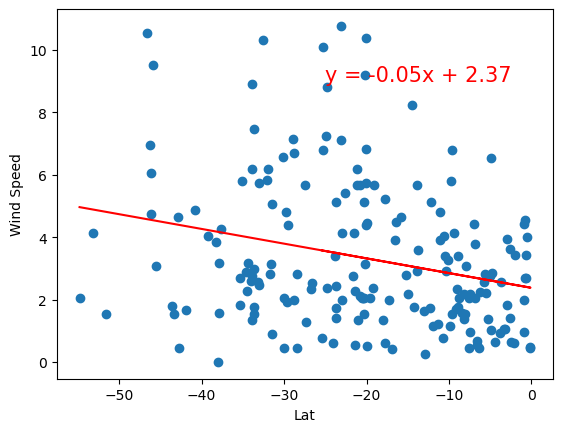

The r-value is: -0.2633252206572445


In [22]:
# Southern Hemisphere
create_lin_plots(southern_hemi_df, 'Lat','Wind Speed',(-25,9))

**Discussion about the linear relationship:** There is no relationship between Latitude and Wind Speed. As Latitude increases, there is no significant change in Wind Speed. 